In [26]:
import qiskit
from qiskit.opflow import I,X,Y,Z
from qiskit.quantum_info import random_statevector
import numpy as np
import matplotlib.pyplot as plt

In [5]:
H1

PauliOp(Pauli('iZ'), coeff=1.0)

In [79]:
all_Hi[0] * coeffs[0]

PauliOp(Pauli('XYI'), coeff=0.7924249214333294)

In [97]:
H1 = X ^ Y ^ I
H2 = I ^ Z ^ X
H3 = Z ^ I ^ Y
H4 = Y ^ X ^ I
H5 = I ^ X ^ Z
H6 = Y ^ I ^ Z
H7 = I ^ X ^ Y
H8 = X ^ I ^ I
H9 = Y ^ Z ^ I
H10 = X ^ Y ^ Z
all_Hi = [H1, H2, H3, H4, H5, H6, H7, H8, H9, H10]

H1_m = H1.to_matrix()
H2_m = H2.to_matrix()
H3_m = H3.to_matrix()
H4_m = H4.to_matrix()
H5_m = H5.to_matrix()
H6_m = H6.to_matrix()
H7_m = H7.to_matrix()
H8_m = H8.to_matrix()
H9_m = H9.to_matrix()
#H10_m = H10.to_matrix()
all_Hi_m = [H1_m, H2_m, H3_m, H4_m, H5_m, H6_m, H7_m, H8_m, H9_m]#, H10_m]

np.random.seed = 20
coeffs = np.random.rand(6)
H = 0
for i in range(len(coeffs)):
    H += all_Hi[i] * coeffs[i] 
    #H = H1 + H2 + H3
H_m = H.to_matrix()

In [93]:
l

array([-2.07599658, -2.07599658, -0.93706539, -0.93706539,  0.85673363,
        0.85673363,  2.15632834,  2.15632834])

In [98]:
l,v = np.linalg.eigh(H_m)
ground_energy = l[0]
ground_state = v[:,0]

m = np.zeros(len(coeffs)+1)
for i in range(len(coeffs)):
    m[i] = ground_state.conj().T @ all_Hi_m[i] @ ground_state
m[-1] = ground_state.conj().T @ H_m @ ground_state
m = np.real(m)

print(m)
print(m, coeffs)
print(m)

[-0.67104844 -0.4008916  -0.61426999 -0.58325512 -0.27788472 -0.05088152
 -1.39708335]
[-0.67104844 -0.4008916  -0.61426999 -0.58325512 -0.27788472 -0.05088152
 -1.39708335] [0.74873192 0.44689219 0.83971255 0.22665349 0.22713559 0.08584832]
[-0.67104844 -0.4008916  -0.61426999 -0.58325512 -0.27788472 -0.05088152
 -1.39708335]


/var/folders/km/wpxhny5j6h7c_prrd3x7j1mc0000gn/T/ipykernel_12126/2123994356.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  m[i] = ground_state.conj().T @ all_Hi_m[i] @ ground_state
/var/folders/km/wpxhny5j6h7c_prrd3x7j1mc0000gn/T/ipykernel_12126/2123994356.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  m[-1] = ground_state.conj().T @ H_m @ ground_state


In [100]:
meas_res = []
res_cal = lambda x,op: x.conj().T @ op @ x

for _ in range(10000):
    state = random_statevector(2**3).data
    res = [res_cal(state,H1_m), res_cal(state,H2_m), res_cal(state,H3_m)]
    res.append(np.inner(res, coeffs[:3]))
    meas_res.append(res)
meas_res = np.real(meas_res)
meas_res

array([[-0.29310276, -0.22610173, -0.26087143, -0.53955551],
       [-0.1620617 , -0.39651875,  0.22532265, -0.10933565],
       [ 0.19459872,  0.13748027, -0.10954009,  0.11515894],
       ...,
       [ 0.41286267, -0.01280705, -0.12339861,  0.19978072],
       [ 0.41602585,  0.04970572,  0.19425682,  0.49682482],
       [ 0.24831071, -0.39669358,  0.06636565,  0.06436696]])

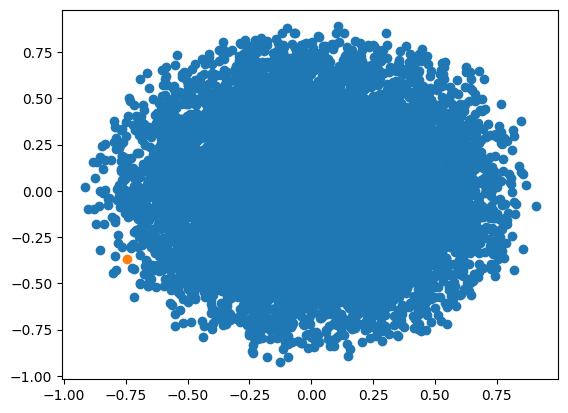

In [101]:
fig = plt.figure()
ax = plt.axes()
xdata = meas_res[:,0]
ydata = meas_res[:,1]
zdata = meas_res[:,2]
ax.scatter(xdata, ydata);
ax.scatter([m1], [m2])

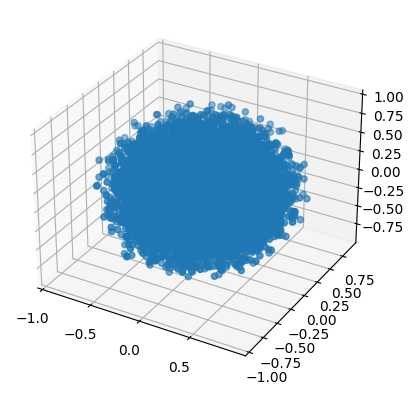

In [102]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = meas_res[:,0]
ydata = meas_res[:,1]
zdata = meas_res[:,2]
ax.scatter3D(xdata, ydata, zdata);